<a href="https://colab.research.google.com/github/roy-sub/Feature-Analysis-of-Deep-Learning-Model/blob/main/MFCC/VAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Divide the Original Dataset Based on "emo_attr"**

In [1]:
# Specify the original dataset_path

originial_dataset = '/content/MFCC.xlsx'

In [3]:
import pandas as pd

df = pd.read_excel(originial_dataset)

# Assuming df is your original DataFrame
unique_values = df['emo_attr'].unique()

# Create and save separate DataFrames for each unique value
for value in unique_values:
    df_n = df[df['emo_attr'] == value]
    globals()[f'df_{value}'] = df_n
    df_n.to_csv(f'df_{value}.csv', index=False)
    print(f"Number of rows in df_{value}: {len(df_n)}")

print(f"Number of rows in df    : {len(df)}")

Number of rows in df_Dom: 160
Number of rows in df_Val: 160
Number of rows in df_Act: 160
Number of rows in df    : 480


#**Visualizing the variation of "Testing Avg CCC" with "Unique Sets of Hyper parameters"**

In [4]:
# Re-assigining the dataframe variable to the sub dataframe

import pandas as pd

df_VAL = pd.read_csv('/content/df_Val.csv')
df = df_VAL

In [5]:
df.head()

,input_dim,emo_attr,feature_name,batch_size,hidden_dim,iterations,lr,statistical_feature,Testing Avg CCC
0,13,Val,mfcc,512,512,2000,0.0005,all,0.011388
1,13,Val,mfcc,512,512,2000,0.0005,all,0.023495
2,13,Val,mfcc,512,512,2000,0.0001,all,0.013058
3,13,Val,mfcc,512,512,2000,0.0003,all,0.025031
4,13,Val,mfcc,64,512,2000,0.0005,all,-0.000102


In [6]:
df.tail()

,input_dim,emo_attr,feature_name,batch_size,hidden_dim,iterations,lr,statistical_feature,Testing Avg CCC
155,13,Val,mfcc,128,256,2000,0.0005,none,0.024439
156,13,Val,mfcc,512,128,2000,0.0005,var,0.023793
157,13,Val,mfcc,512,64,2000,0.0001,none,0.029866
158,13,Val,mfcc,64,64,2000,0.0003,var,0.029495
159,13,Val,mfcc,512,512,2000,0.0003,var,0.000015


In [7]:
statistics = df['Testing Avg CCC'].describe()

# Print the statistics
statistics

count    160.000000
mean       0.019341
std        0.018174
min       -0.040232
25%        0.006324
50%        0.017099
75%        0.032851
max        0.065460
Name: Testing Avg CCC, dtype: float64

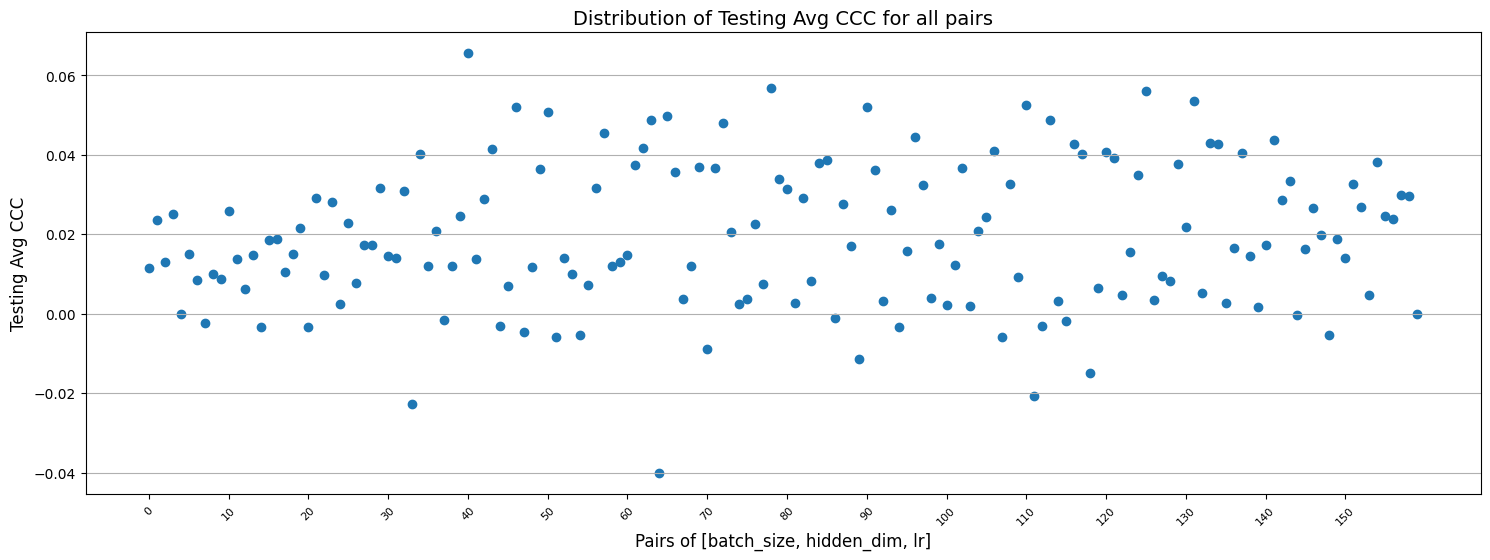

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(18, 6))
plt.scatter(range(len(df)), df['Testing Avg CCC'])
plt.xlabel('Pairs of [batch_size, hidden_dim, lr]', fontsize=12)
plt.ylabel('Testing Avg CCC', fontsize=12)
plt.title('Distribution of Testing Avg CCC for all pairs', fontsize=14)
plt.xticks(range(0, len(df), 10), df.index[::10], rotation=45, fontsize=8)
plt.grid(axis='y')
plt.show()

In [9]:
unique_pairs = df[['batch_size', 'hidden_dim', 'lr']].drop_duplicates()
unique_pairs

,batch_size,hidden_dim,lr
0,512,512,0.0005
2,512,512,0.0001
3,512,512,0.0003
4,64,512,0.0005
6,128,512,0.0005
7,64,64,0.0003
8,64,64,0.0005
11,128,512,0.0003
12,128,64,0.0003
17,64,128,0.0003


In [10]:
len(unique_pairs) # must be <= 36

34

In [11]:
import pandas as pd

# Get unique pairs of ['batch_size', 'hidden_dim', 'lr']
unique_pairs = df[['batch_size', 'hidden_dim', 'lr']].drop_duplicates()

# Create an empty DataFrame to store the result
df_new = pd.DataFrame(columns=['unique pairs of hyperparameters', 'Testing Avg CCCs'])

# Iterate over unique pairs and collect Testing Avg CCC values
for index, row in unique_pairs.iterrows():
    mask = (df['batch_size'] == row['batch_size']) & \
           (df['hidden_dim'] == row['hidden_dim']) & \
           (df['lr'] == row['lr'])
    testing_avg_ccc_values = df[mask]['Testing Avg CCC'].tolist()
    hyperparameters_list = [row['batch_size'], row['hidden_dim'], row['lr']]
    df_to_append = pd.DataFrame({'unique pairs of hyperparameters': [hyperparameters_list], 'Testing Avg CCCs': [testing_avg_ccc_values]})
    df_new = pd.concat([df_new, df_to_append], ignore_index=True)

df_new.head()

,unique pairs of hyperparameters,Testing Avg CCCs
0,"[512.0, 512.0, 0.0005]","[0.0113876415183767, 0.0234950846681992, 0.025..."
1,"[512.0, 512.0, 0.0001]","[0.013057745511954, 0.0024554823331224, 0.0076..."
2,"[512.0, 512.0, 0.0003]","[0.0250309430373211, 0.0364950033525625, 1.518..."
3,"[64.0, 512.0, 0.0005]","[-0.0001019986889635, 0.0149837629015867, 0.01..."
4,"[128.0, 512.0, 0.0005]","[0.008534314277737, 0.0086637414887566, 0.0216..."


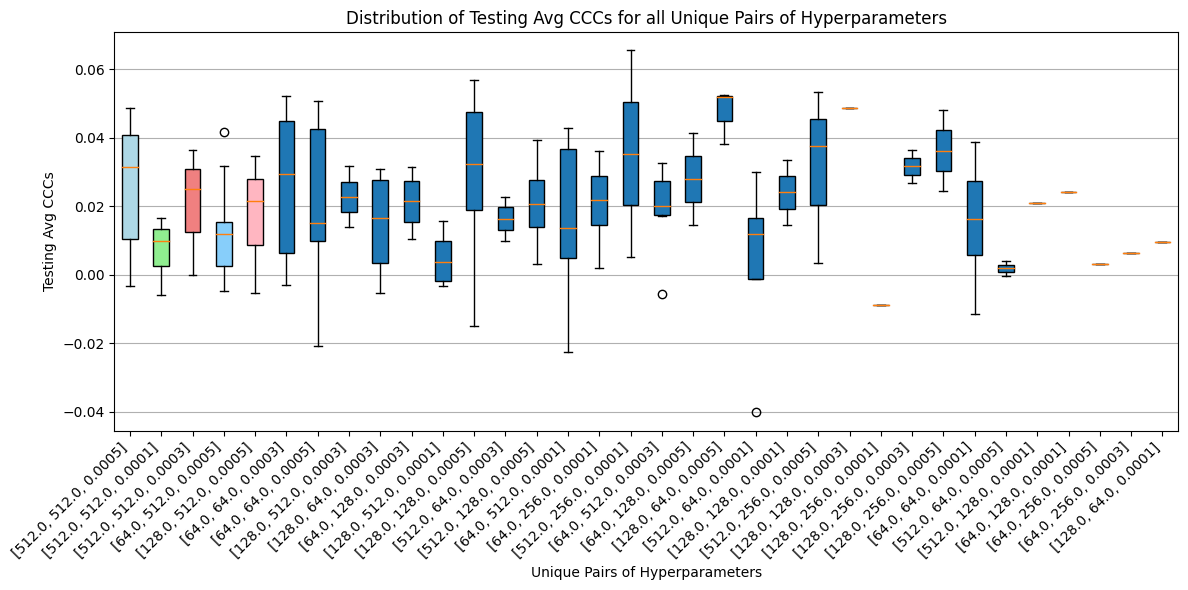

In [12]:
# Diagrammatic Representation
plt.figure(figsize=(12, 6))
box = plt.boxplot(df_new['Testing Avg CCCs'], labels=df_new['unique pairs of hyperparameters'], patch_artist=True)

# Customizing boxplot colors
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Unique Pairs of Hyperparameters')
plt.ylabel('Testing Avg CCCs')
plt.title('Distribution of Testing Avg CCCs for all Unique Pairs of Hyperparameters')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

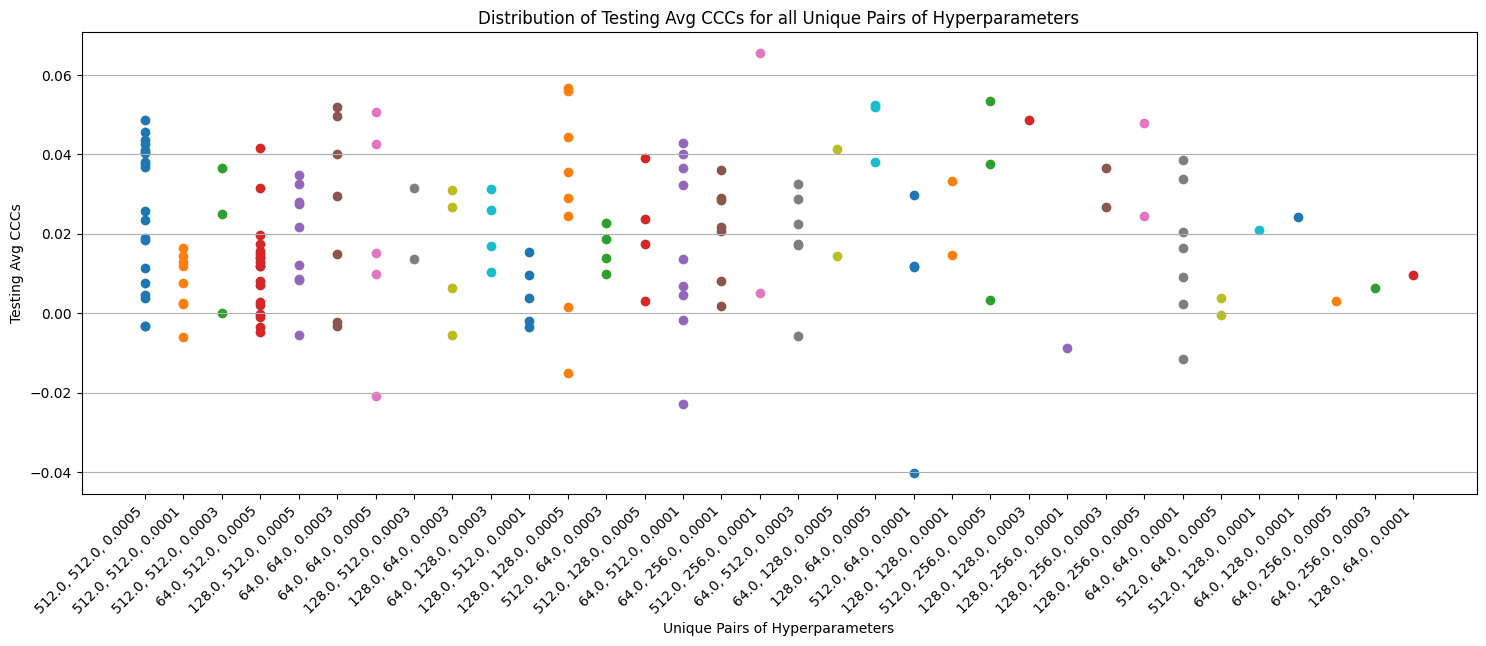

In [14]:
import matplotlib.pyplot as plt

# Assuming df_new is your DataFrame

# Create a scatter plot
plt.figure(figsize=(18, 6))
for i, row in df_new.iterrows():
    pair_str = ', '.join([str(x) for x in row['unique pairs of hyperparameters']])
    plt.scatter([pair_str]*len(row['Testing Avg CCCs']), row['Testing Avg CCCs'], label=pair_str)

plt.xlabel('Unique Pairs of Hyperparameters')
plt.ylabel('Testing Avg CCCs')
plt.title('Distribution of Testing Avg CCCs for all Unique Pairs of Hyperparameters')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

#**Filter the Dataframe based on the "Unique Set of Hyper Parameneter"**

In [15]:
# Assigning batch_size,	hidden_dim and lr to the selected values

[batch_size_high_ccc,	hidden_dim_high_ccc, lr_high_ccc] = [128.0, 128.0, 0.0005]
[batch_size_low_ccc,	hidden_dim_low_ccc, lr_low_ccc] = [64.0, 512.0, 0.0005]
[batch_size_sparse_ccc,	hidden_dim_sparse_ccc, lr_spare_ccc] = [512.0, 512.0, 0.0005]

print(f"batch_size_high_ccc : {batch_size_high_ccc} \nhidden_dim_high_ccc : {hidden_dim_high_ccc} \nlr_high_ccc : {lr_high_ccc}\n")
print(f"batch_size_low_ccc : {batch_size_low_ccc} \nhidden_dim_low_ccc : {hidden_dim_low_ccc} \nlr_high_ccc : {lr_low_ccc}\n")
print(f"batch_size_sparse_ccc : {batch_size_sparse_ccc} \nhidden_dim_sparse_ccc : {hidden_dim_sparse_ccc} \nlr_spare_ccc : {lr_spare_ccc}")

batch_size_high_ccc : 128.0 
hidden_dim_high_ccc : 128.0 
lr_high_ccc : 0.0005

batch_size_low_ccc : 64.0 
hidden_dim_low_ccc : 512.0 
lr_high_ccc : 0.0005

batch_size_sparse_ccc : 512.0 
hidden_dim_sparse_ccc : 512.0 
lr_spare_ccc : 0.0005


In [16]:
df_filtered_high = df[(df['batch_size'] == batch_size_high_ccc) & (df['hidden_dim'] == hidden_dim_high_ccc) & (df['lr'] == lr_high_ccc)]
df_filtered_low = df[(df['batch_size'] == batch_size_low_ccc) & (df['hidden_dim'] == hidden_dim_low_ccc) & (df['lr'] == lr_low_ccc)]
df_filtered_sparse = df[(df['batch_size'] == batch_size_sparse_ccc) & (df['hidden_dim'] == hidden_dim_sparse_ccc) & (df['lr'] == lr_spare_ccc)]

In [17]:
df_filtered_high = df_filtered_high.reset_index(drop=True)
df_filtered_low = df_filtered_low.reset_index(drop=True)
df_filtered_sparse = df_filtered_sparse.reset_index(drop=True)

In [18]:
df_filtered_high.head()

,input_dim,emo_attr,feature_name,batch_size,hidden_dim,iterations,lr,statistical_feature,Testing Avg CCC
0,13,Val,mfcc,128,128,2000,0.0005,median,0.028981
1,13,Val,mfcc,128,128,2000,0.0005,median,0.024640
2,13,Val,mfcc,128,128,2000,0.0005,mean,0.035646
3,13,Val,mfcc,128,128,2000,0.0005,mean,0.056699
4,13,Val,mfcc,128,128,2000,0.0005,mean,0.044515


In [19]:
df_filtered_low.head()

,input_dim,emo_attr,feature_name,batch_size,hidden_dim,iterations,lr,statistical_feature,Testing Avg CCC
0,13,Val,mfcc,64,512,2000,0.0005,all,-0.000102
1,13,Val,mfcc,64,512,2000,0.0005,all,0.014984
2,13,Val,mfcc,64,512,2000,0.0005,min,0.017373
3,13,Val,mfcc,64,512,2000,0.0005,min,0.013898
4,13,Val,mfcc,64,512,2000,0.0005,min,0.011870


In [20]:
df_filtered_sparse.head()

,input_dim,emo_attr,feature_name,batch_size,hidden_dim,iterations,lr,statistical_feature,Testing Avg CCC
0,13,Val,mfcc,512,512,2000,0.0005,all,0.011388
1,13,Val,mfcc,512,512,2000,0.0005,all,0.023495
2,13,Val,mfcc,512,512,2000,0.0005,all,0.025769
3,13,Val,mfcc,512,512,2000,0.0005,all,-0.003271
4,13,Val,mfcc,512,512,2000,0.0005,all,0.018481


In [21]:
print(f"df_filtered_high: {len(df_filtered_high)} \ndf_filtered_low: {len(df_filtered_low)} \ndf_filtered_sparse: {len(df_filtered_sparse)}")

df_filtered_high: 8 
df_filtered_low: 19 
df_filtered_sparse: 20


#**Perform the Analysis to Determine the Most Efficient "statistical_feature"**

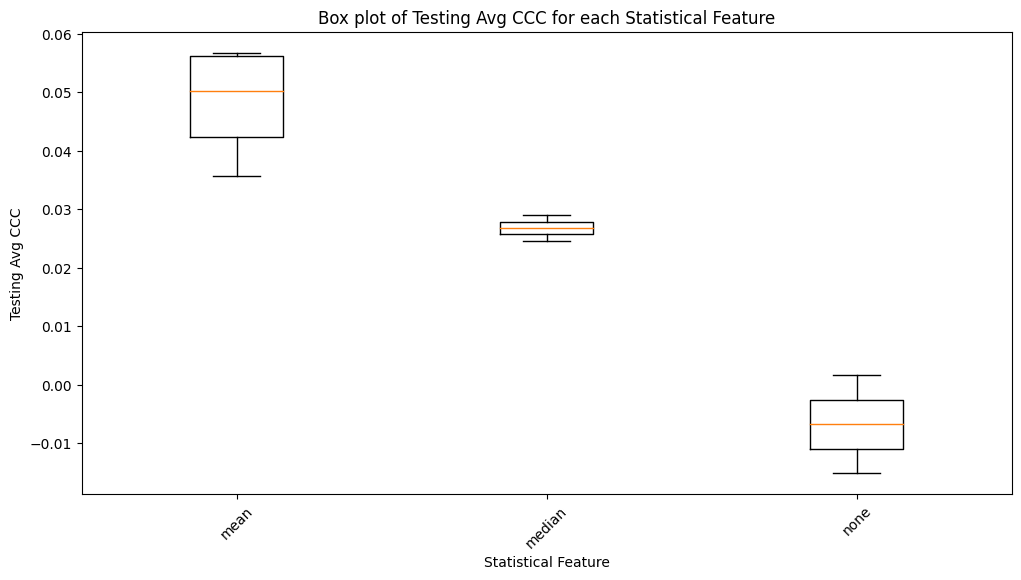

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns "statistical_feature" and "Testing Avg CCC"

# Create an empty list to store box plot data
boxplot_data = []

# Group the DataFrame by "statistical_feature"
grouped = df_filtered_high.groupby('statistical_feature')

# Create a box plot for each group
for name, group in grouped:
    boxplot_data.append(group['Testing Avg CCC'])

# Create a box plot
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data, labels=grouped.groups.keys())
plt.xlabel('Statistical Feature')
plt.ylabel('Testing Avg CCC')
plt.title('Box plot of Testing Avg CCC for each Statistical Feature')
plt.xticks(rotation=45)
plt.show()

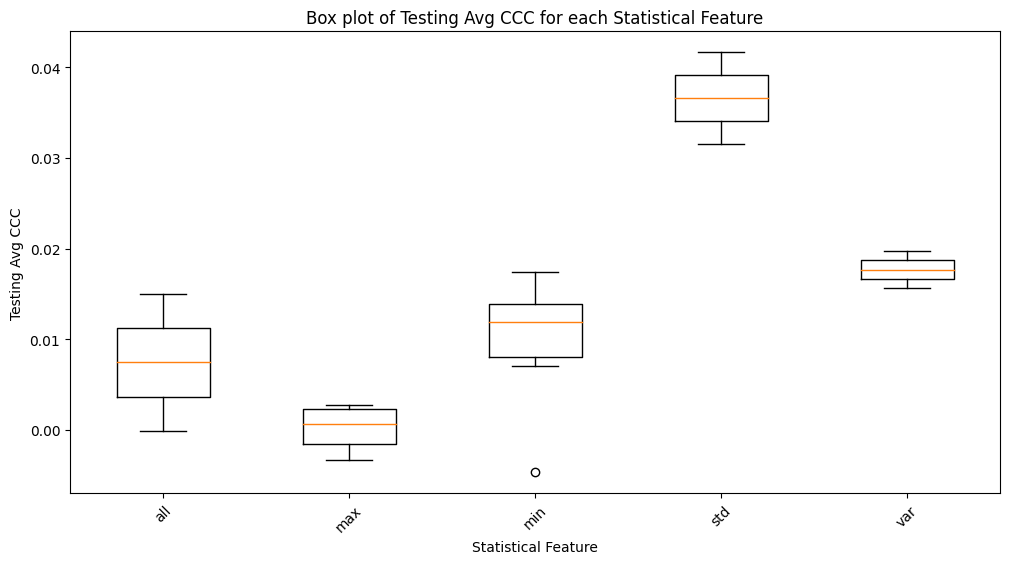

In [23]:
# Create an empty list to store box plot data
boxplot_data = []

# Group the DataFrame by "statistical_feature"
grouped = df_filtered_low.groupby('statistical_feature')

# Create a box plot for each group
for name, group in grouped:
    boxplot_data.append(group['Testing Avg CCC'])

# Create a box plot
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data, labels=grouped.groups.keys())
plt.xlabel('Statistical Feature')
plt.ylabel('Testing Avg CCC')
plt.title('Box plot of Testing Avg CCC for each Statistical Feature')
plt.xticks(rotation=45)
plt.show()

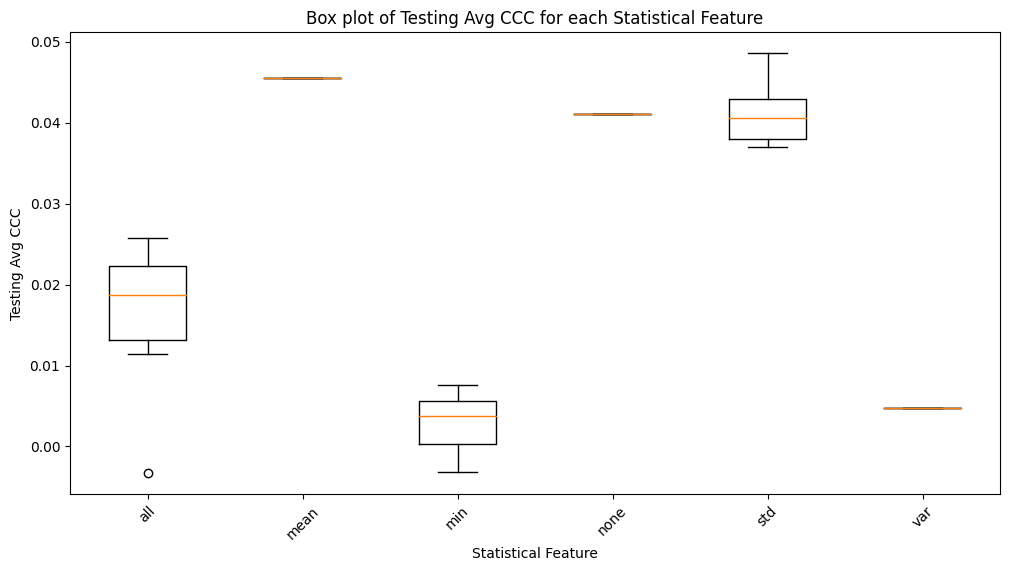

In [24]:
# Create an empty list to store box plot data
boxplot_data = []

# Group the DataFrame by "statistical_feature"
grouped = df_filtered_sparse.groupby('statistical_feature')

# Create a box plot for each group
for name, group in grouped:
    boxplot_data.append(group['Testing Avg CCC'])

# Create a box plot
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data, labels=grouped.groups.keys())
plt.xlabel('Statistical Feature')
plt.ylabel('Testing Avg CCC')
plt.title('Box plot of Testing Avg CCC for each Statistical Feature')
plt.xticks(rotation=45)
plt.show()

#**Advanced Analysis to Determine the Most Efficient "statistical_feature"**

In [25]:
! pip install -q eli5
! pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.3 MB/s eta 0:00:00


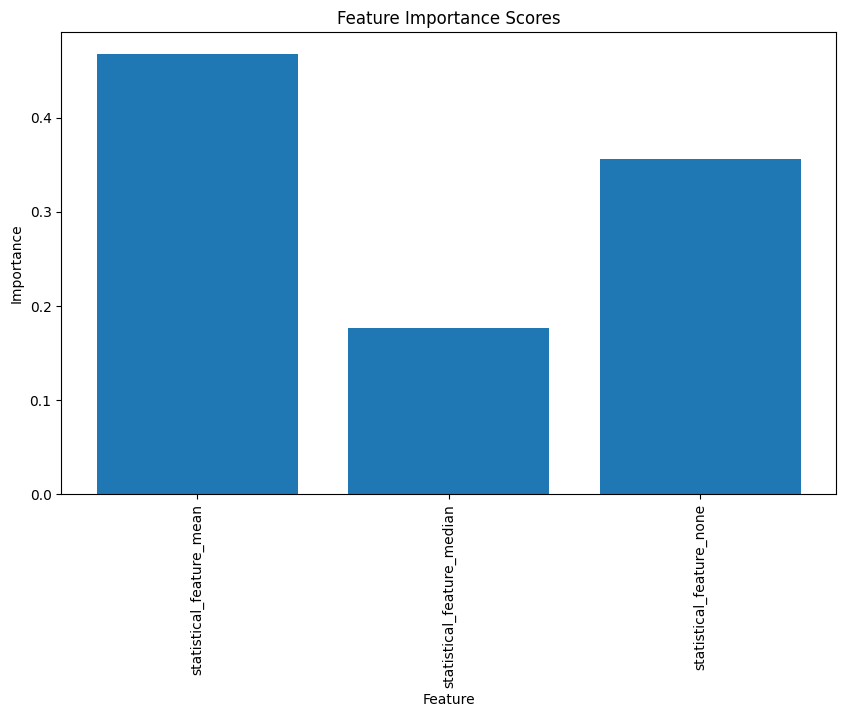

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
X_h = df_filtered_high[['statistical_feature']]
y_h = df_filtered_high['Testing Avg CCC']

# Convert categorical variables into numerical ones using one-hot encoding
X_encoded_h = pd.get_dummies(X_h)

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_encoded_h, y_h, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model_h = RandomForestRegressor(n_estimators=100, random_state=42)
model_h.fit(X_train_h, y_train_h)

# Get feature importances
importances = model_h.feature_importances_
features = X_encoded_h.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.xticks(rotation=90)
plt.show()

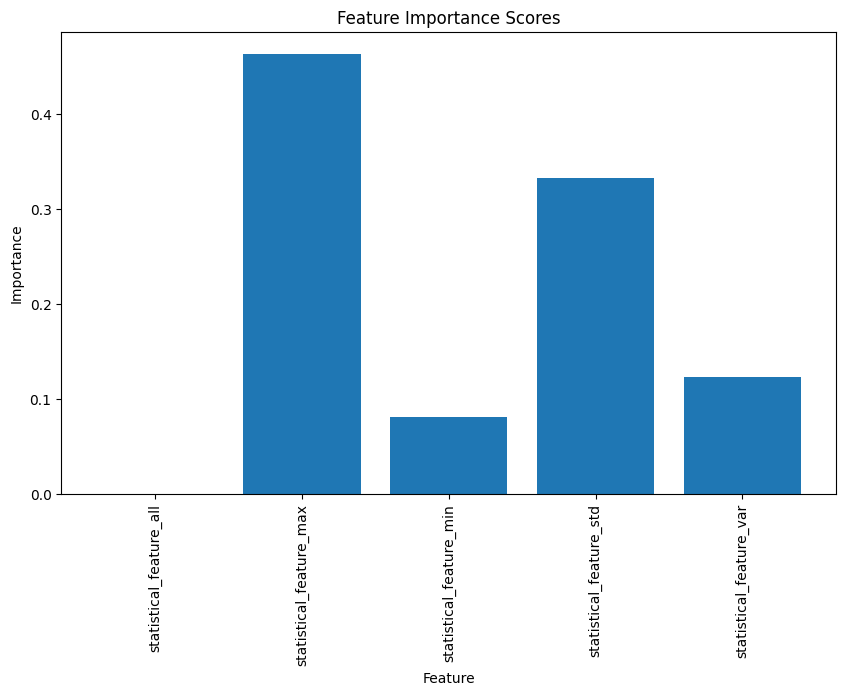

In [27]:
# Assuming df is your DataFrame
X_l = df_filtered_low[['statistical_feature']]
y_l = df_filtered_low['Testing Avg CCC']

# Convert categorical variables into numerical ones using one-hot encoding
X_encoded_l = pd.get_dummies(X_l)

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_encoded_l, y_l, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model_l = RandomForestRegressor(n_estimators=100, random_state=42)
model_l.fit(X_train_l, y_train_l)

# Get feature importances
importances = model_l.feature_importances_
features = X_encoded_l.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.xticks(rotation=90)
plt.show()

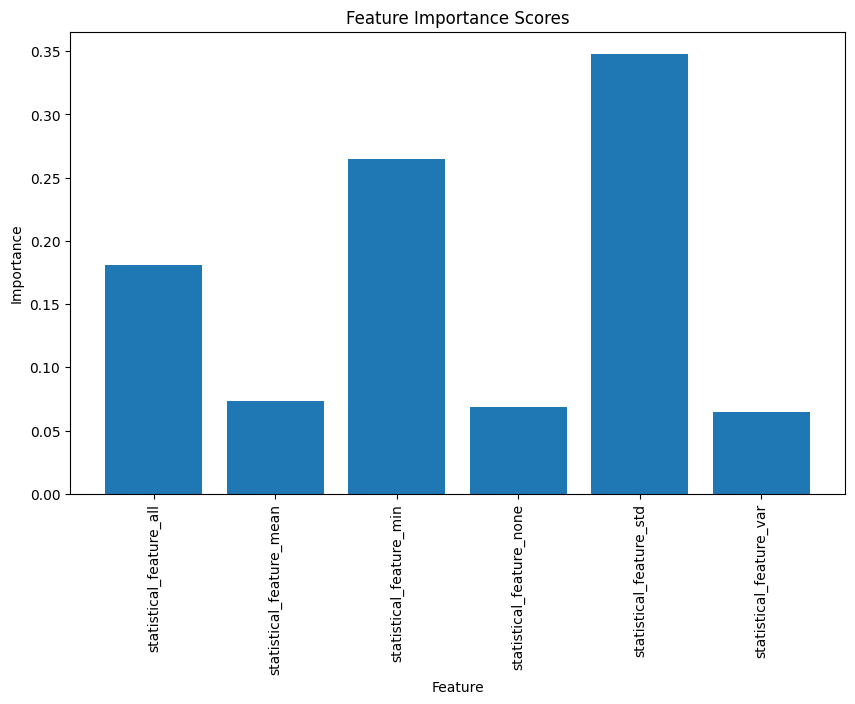

In [28]:
# Assuming df is your DataFrame
X_s = df_filtered_sparse[['statistical_feature']]
y_s = df_filtered_sparse['Testing Avg CCC']

# Convert categorical variables into numerical ones using one-hot encoding
X_encoded_s = pd.get_dummies(X_s)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_encoded_s, y_s, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model_s = RandomForestRegressor(n_estimators=100, random_state=42)
model_s.fit(X_train_s, y_train_s)

# Get feature importances
importances = model_s.feature_importances_
features = X_encoded_s.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.xticks(rotation=90)
plt.show()

In [29]:
import eli5
from eli5.sklearn import PermutationImportance

perm_h = PermutationImportance(model_h, random_state=42).fit(X_test_h , y_test_h )
eli5.show_weights(perm_h, feature_names=X_test_h .columns.tolist())

Weight,Feature
0.9689 ± 1.5822,statistical_feature_none
0.0281 ± 0.0281,statistical_feature_median
0 ± 0.0000,statistical_feature_mean


In [30]:
perm_l = PermutationImportance(model_l, random_state=42).fit(X_test_l , y_test_l )
eli5.show_weights(perm_l, feature_names=X_test_l .columns.tolist())

Weight,Feature
0.7208 ± 0.7941,statistical_feature_std
0.0220 ± 0.0748,statistical_feature_min
0 ± 0.0000,statistical_feature_var
0 ± 0.0000,statistical_feature_max
0 ± 0.0000,statistical_feature_all


In [31]:
perm_s = PermutationImportance(model_s, random_state=42).fit(X_test_s , y_test_s )
eli5.show_weights(perm_s, feature_names=X_test_s .columns.tolist())

Weight,Feature
0.7479 ± 0.6358,statistical_feature_std
0.1771 ± 0.3753,statistical_feature_all
0 ± 0.0000,statistical_feature_var
0 ± 0.0000,statistical_feature_none
0 ± 0.0000,statistical_feature_min
0 ± 0.0000,statistical_feature_mean


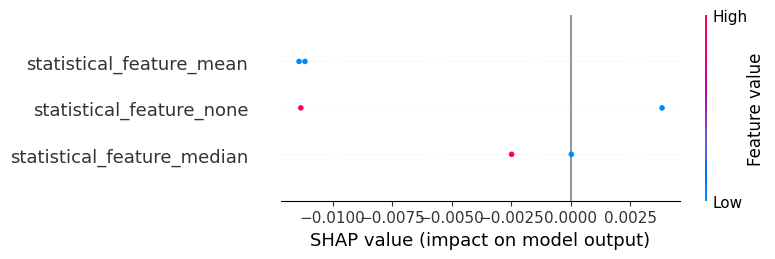

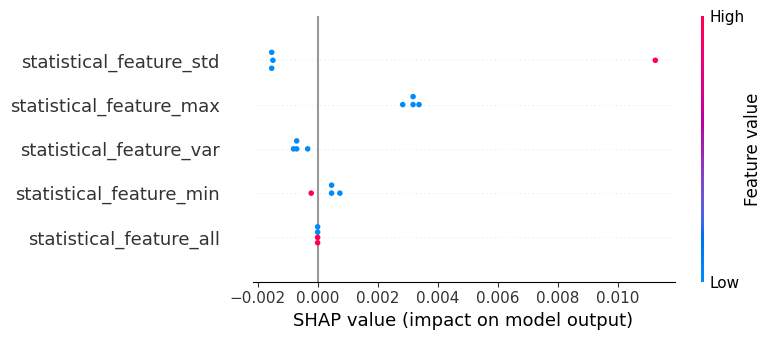

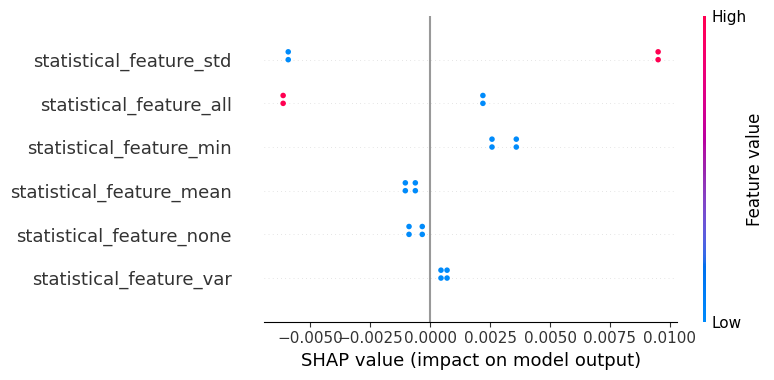

In [32]:
import shap

explainer_h = shap.TreeExplainer(model_h)
shap_values_h = explainer_h.shap_values(X_test_h)
shap.summary_plot(shap_values_h, X_test_h)

explainer_l = shap.TreeExplainer(model_l)
shap_values_l = explainer_l.shap_values(X_test_l)
shap.summary_plot(shap_values_l, X_test_l)

explainer_s = shap.TreeExplainer(model_s)
shap_values_s = explainer_s.shap_values(X_test_s)
shap.summary_plot(shap_values_s, X_test_s)